<a href="https://colab.research.google.com/github/melihilerialkan/BachelorFingerprintVollstaendigung/blob/main/Vollst%C3%A4ndigung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from glob import glob
import scipy.misc
import cv2
import numpy as np
import pandas as pd
from PIL import Image
from keras import backend as K
from keras import losses
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.layers import Input, MaxPooling2D
from keras.layers import concatenate, Conv2D, Conv2DTranspose, Dropout, LeakyReLU, PReLU, ReLU
from keras.models import Model
from keras.activations import relu
from keras.optimizers import Adam
from numpy import random
from sklearn.model_selection import KFold
from skimage.transform import resize
from sklearn.model_selection import train_test_split

In [2]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
%matplotlib inline
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model
from keras.optimizers import RMSprop
from keras.layers.normalization import BatchNormalization

In [3]:
img_size = 500
#Function to iterate through all the images
def datenladen(path):
    data = []
    for i in range (100):
        try:
            print(path[i])
            img= cv2.imread(path[i], cv2.IMREAD_GRAYSCALE)
            img_last = cv2.resize(img, (img_size, img_size))
            data.append([img_last])
        except Exception as e:
            pass
    
    return data

In [4]:
data = glob("/content/drive/MyDrive/anguli/*")

In [5]:
data = sorted(data)

In [ ]:
# altered_path = "/content/drive/MyDrive/anguli"
altered = datenladen(data)
# X= []
# for feature in altered:
#     X.append(feature)
X = np.array(altered).reshape(-1, img_size, img_size, 1)
X = X / 255.0
del altered

In [7]:
real_path = glob("/content/drive/MyDrive/realanguli/*")

In [8]:
real_path = sorted(real_path)

In [ ]:
# real_path = "/content/drive/MyDrive/realanguli/*"
real = datenladen(real_path)
# y_real= []
# for feature in real:
#     y_real.append(feature)
y_real= np.array(real).reshape(-1, img_size, img_size, 1)
y_real = y_real / 255.0
del real

In [23]:
test = glob("/content/drive/MyDrive/rec/*")

In [24]:
test = sorted(test)

In [ ]:
# real_path = "/content/drive/MyDrive/realanguli/*"
test = datenladen(test)
# y_real= []
# for feature in real:
#     y_real.append(feature)
X_test= np.array(test).reshape(-1, img_size, img_size, 1)
X_test = X_test / 255.0


In [27]:
test_y = glob("/content/drive/MyDrive/recreal/*")

In [28]:
test_y = sorted(test_y)

In [ ]:
# real_path = "/content/drive/MyDrive/realanguli/*"
test_y = datenladen(test_y)
# y_real= []
# for feature in real:
#     y_real.append(feature)
y_test= np.array(test_y).reshape(-1, img_size, img_size, 1)
y_test = y_test / 255.0


In [ ]:
test_path = "/deneme"
test_altered = datenladen(test_path)
test= []
for feature in test_altered:
    test.append(feature)
test = np.array(test).reshape(-1, img_size, img_size, 1)
test = test / 255.0  
del test_altered

In [ ]:
real_path = "/real"
real = datenladen(real_path)
test_real= []
for feature in real:
    test_real.append(feature)
test_real = np.array(test_real).reshape(-1, img_size, img_size, 1)
test_real = test_real / 255.0  
del real

In [10]:
batch_size = 8
epochs = 20
z = 1
x, y = 500, 500
input= Input(shape = (x, y, z))

In [11]:
def model(input):
    
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) 
    
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    up1 = UpSampling2D((2,2))(conv4)
    conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1)
    up2 = UpSampling2D((2,2))(conv5)
    model = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2)
    return model

In [12]:
model = Model(input, model(input))
model.compile(loss='mean_squared_error', optimizer = Adam())

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X,y_real,test_size=0.2)

In [14]:
model_result = model.fit(X_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_valid, y_valid))

Epoch 1/20
10/10 [==============================] - 188s 19s/step - loss: 0.1240 - val_loss: 0.0947
Epoch 2/20
10/10 [==============================] - 180s 18s/step - loss: 0.0923 - val_loss: 0.0816
Epoch 3/20
10/10 [==============================] - 177s 18s/step - loss: 0.0735 - val_loss: 0.0495
Epoch 4/20
10/10 [==============================] - 182s 18s/step - loss: 0.0446 - val_loss: 0.0377
Epoch 5/20
10/10 [==============================] - 180s 18s/step - loss: 0.0367 - val_loss: 0.0364
Epoch 6/20
10/10 [==============================] - 180s 18s/step - loss: 0.0334 - val_loss: 0.0319
Epoch 7/20
10/10 [==============================] - 178s 18s/step - loss: 0.0302 - val_loss: 0.0306
Epoch 8/20
10/10 [==============================] - 179s 18s/step - loss: 0.0292 - val_loss: 0.0288
Epoch 9/20
10/10 [==============================] - 178s 18s/step - loss: 0.0275 - val_loss: 0.0284
Epoch 10/20
10/10 [==============================] - 179s 18s/step - loss: 0.0277 - val_loss: 0.0278

In [31]:
pred = model.predict(X_valid)

Test Images


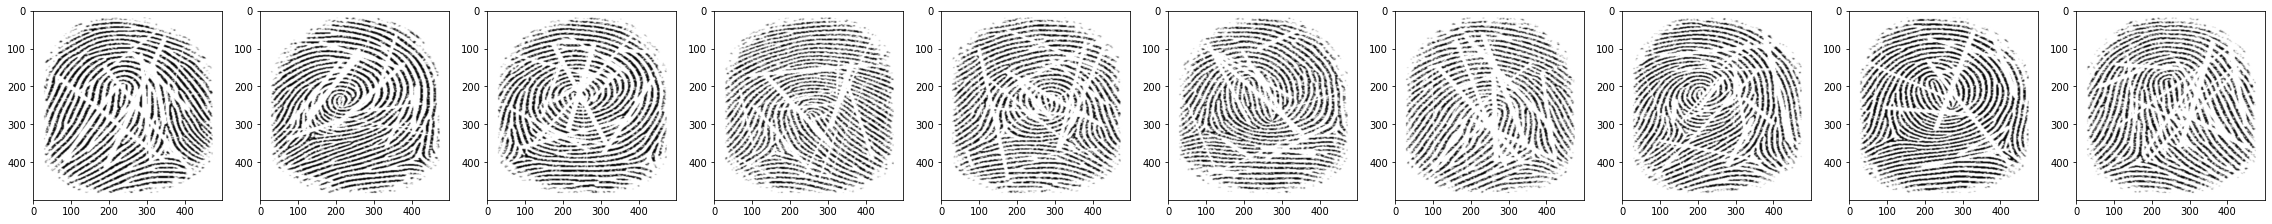

Reconstruction of Test Images


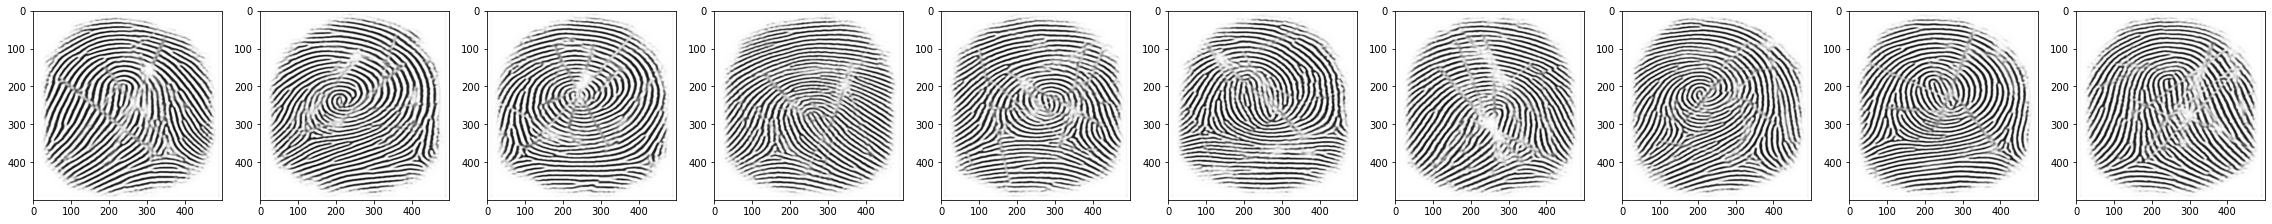

In [34]:
plt.figure(figsize=(40, 40))
print("Test Images")
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_valid[i, ..., 0], cmap='gray')
plt.show()    
plt.figure(figsize=(40, 40))
print("Reconstruction of Test Images")
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(pred[i, ..., 0], cmap="gray")  
plt.show()